![collaboration](collaboration2.png)

# How can the company improve collaboration?

## 📖 Background

Multinational companies face constant challenges when working and collaborating across divisions. This analysis aims to assist the head of HR to understand how the company's employee network uses message data. This will allow them to understand interdepartmental dynamics and explore how the company shares information; with the ultimate goal to improve collaboration throughout the company.  

## 💾 The data

HR shared six months of information on inter-employee communication. For privacy reasons, only sender, receiver and message length information are available. The following link provides access to the datasource [(source)](https://snap.stanford.edu/data/CollegeMsg.html). 

The datasource includes two tables `data/messages.csv` and `data/employees.csv`. 

The messages dataset include the following fields:
- `sender` - represents the employee id of the employee sending the message. 
- `receiver` - represents the employee id of the employee receiving the message.
- `timestamp` - the date of the message.
- `message_length` - the length in words of the message.

The employees dataset has the following collumns:
- `id` - represents the employee id of the employee.
- `department` - is the department within the company. 
- `location` - is the country where the employee lives.
- `age` - is the age of the employee.

_**Acknowledgments:** Pietro Panzarasa, Tore Opsahl, and Kathleen M. Carley. "Patterns and dynamics of users' behavior and interaction: Network analysis of an online community." Journal of the American Society for Information Science and Technology 60.5 (2009): 911-932._

## 🪴 Setting up the Environment

For the purpose of the Network Analysis, the required software packages were downloaded to elaborate the corresponding analysis in Python.  

In [2]:
# Importing the required software packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🔎 Inspecting the Data

Next, the two tables were imported (`data/messages.csv` and `data/employees.csv`). Before starting the analysis, we first inspected the information to make sure and validate that the tables contain the expected information provided by HR. 

In [3]:
# Previewing the 'Messages' dataset.
messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
print('Preview of the "messages" dataset:')
messages

Preview of the "messages" dataset:


,sender,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86
3,79,70,2021-06-02 05:49:07,26
4,79,109,2021-06-02 19:51:47,73
...,...,...,...,...
3507,469,1629,2021-11-24 05:04:57,75
3508,1487,1543,2021-11-26 00:39:43,25
3509,144,1713,2021-11-28 18:30:47,51
3510,1879,1520,2021-11-29 07:27:52,58


In [4]:
# Previewing the 'Employees' dataset.
employees = pd.read_csv('data/employees.csv')
print('Preview of the "employees" dataset:')
employees

Preview of the "employees" dataset:


,id,department,location,age
0,3,Operations,US,33
1,6,Sales,UK,50
2,8,IT,Brasil,54
3,9,Admin,UK,32
4,12,Operations,Brasil,51
...,...,...,...,...
659,1830,Admin,UK,42
660,1839,Admin,France,28
661,1879,Engineering,US,40
662,1881,Sales,Germany,57


As previously communicated by the HR department, both tables contain the correct fields that will allow us to work on the analysis. 

## 🧹 Data Validation and Cleaning Process

Before conducting the analysis, we wanted to know the integrity of the data at hand, as well as to determine if any column requires any cleaning or transformation process. To do this, we will get the general information from the datasets.

In [5]:
# General information: number of observations, columns, non-missing values, data types, memory usage
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sender          3512 non-null   int64         
 1   receiver        3512 non-null   int64         
 2   timestamp       3512 non-null   datetime64[ns]
 3   message_length  3512 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 109.9 KB


In [6]:
# General information: number of observations, columns, non-missing values, data types, memory usage
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          664 non-null    int64 
 1   department  664 non-null    object
 2   location    664 non-null    object
 3   age         664 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 20.9+ KB


In [7]:
# Confirming timestamps (minimum and maximum dates)
print('Messages sent/received from ' + str(messages['timestamp'].min()) + ' to ' + str(messages['timestamp'].max()))

Messages sent/received from 2021-06-02 05:41:34 to 2021-11-29 07:37:49


In [8]:
# Confirming message lengths (minimum and maximum lengths)
print('Message with the lowest length: ' + str(messages['message_length'].min()))
print('Message with the highest length: ' + str(messages['message_length'].max()))

Message with the lowest length: 10
Message with the highest length: 88


The 'messages' dataset contains 3,512 observations and 4 columns. There is no missing information, which helps for the integrity of the analysis; and all data types are correctly handled. 

On the other hand, the 'employees' dataset contains 664 entries and 4 columns. This table also does not contain missing information, and all data types are correcly selected. 

As expected, the information covers six months: June, July, August, September, October and November 2021. Thus, there is no need for a cleaning process of the dataset.  

## 📈 Data Analysis

This section of the report will provide a general analysis of the information at hand. This in order to have better understanding of the data before attempting to answer some of the questions made by the head of HR. 

### Number of Messages


We will start by exploring the number of messages sent during the period, as well as the number of unique senders and receivers. 

In [9]:
# Count number of unique senders and receivers
data = {'Total Messages' : [messages['sender'].count()], 'Unique Senders' : [messages['sender'].nunique()], 'Unique Receivers' : [messages['receiver'].nunique()]}
number_of_messages = pd.DataFrame(data)
number_of_messages 

,Total Messages,Unique Senders,Unique Receivers
0,3512,85,617


The total dataset contains information on 3,512 messages sent. These messages come from 85 unique senders. In addition, from the total messages sent, there were 617 unique receivers. 

### Messages by Location

In order to calculate the number of messages sent and received by employee location, two datasets were created. 
1. The first one was created by merging the `messages` dataset with the `employees` dataset through the `sender id`. This allows us to know the location on the sender. 
2. The second table was creating by merging the same tables, however, through the `receiver id`. This allow us to know the location on the receiver. 

In [10]:
# Creation of database 'sent_emails'
sent_emails = messages.merge(employees, left_on = 'sender', right_on = 'id')

# Creation of database 'received_emails'
received_emails = messages.merge(employees, left_on = 'receiver', right_on = 'id')

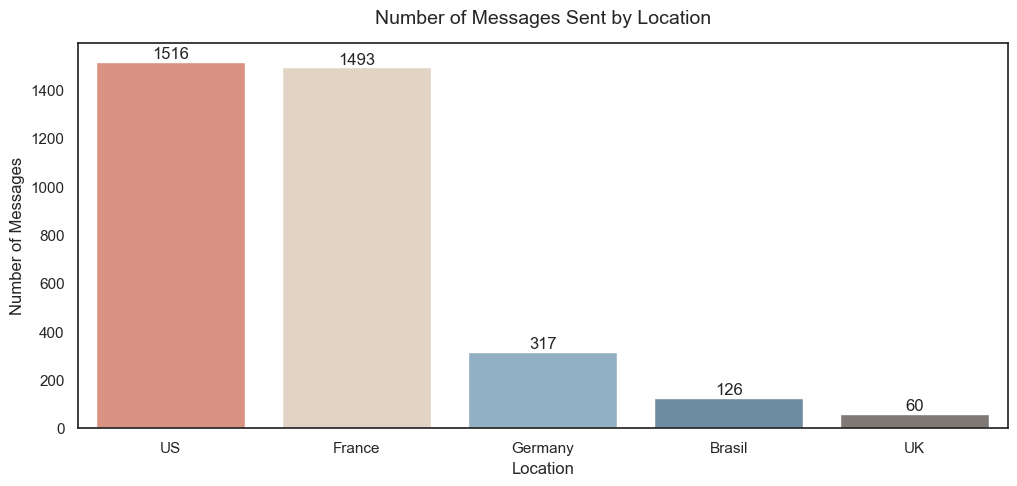

In [11]:
# Number of messages sent by location
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = sent_emails, x = 'location', order = sent_emails['location'].value_counts().index, palette= {'US':'#E98973', 'France':'#E7D4C0', 'Germany':'#88B2CC', 'Brasil':'#658EA9', 'UK':'#817874'})
plt.title('Number of Messages Sent by Location', y = 1.03, size = 14)
plt.xlabel('Location')
plt.ylabel('Number of Messages')
ax.bar_label(ax.containers[0])
plt.show()

The United States and France are the two locations with the highest number of messages sent during the period between June 2nd and November 29th 2021. Followed by Germany, Brasil and the UK. 

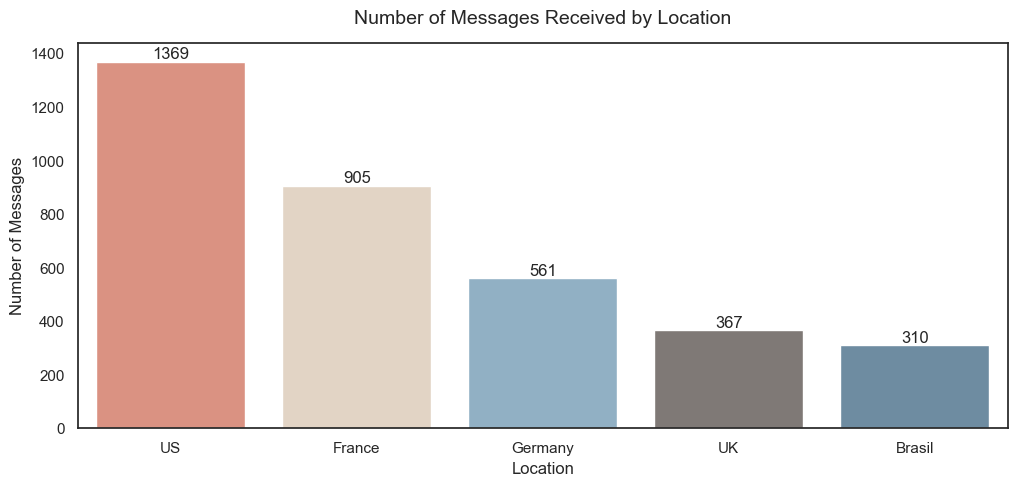

In [12]:
# Number of messages received by location
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = received_emails, x = 'location', order = received_emails['location'].value_counts().index, palette= {'US':'#E98973', 'France':'#E7D4C0', 'Germany':'#88B2CC', 'Brasil':'#658EA9', 'UK':'#817874'})
plt.title('Number of Messages Received by Location', y = 1.03, size = 14)
plt.xlabel('Location')
plt.ylabel('Number of Messages')
ax.bar_label(ax.containers[0])
plt.show()

In contrast, for received emails, the main two locations still stand as United States and France; however, United states with a wider marging. Followed by Germany, UK and Brasil.

### Messages by Department

The next step to understand interdepartmental dynamics is to visualize which are the departments which send and receive the most and least number of messages. 

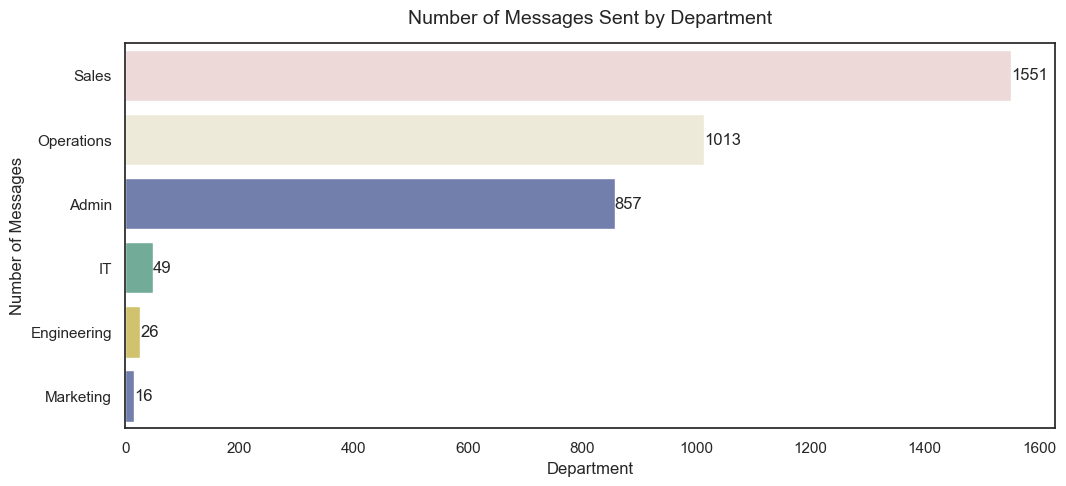

In [13]:
# Number of messages sent by department
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = sent_emails, y = 'department', order = sent_emails['department'].value_counts().index, palette= {'Sales':'#f2d6d5', 'Operations':'#f2ecd5', 'Admin':'#6879b6', 'IT':'#68b69b', 'Engineering':'#e2cd5d', 'Marketing': '#6879b6'})
plt.title('Number of Messages Sent by Department', y = 1.03, size = 14)
plt.xlabel('Department')
plt.ylabel('Number of Messages')
ax.bar_label(ax.containers[0])
plt.show()

In [14]:
# Finding out percentages
sent_emails['department'].value_counts(normalize = True)

Sales          0.441629
Operations     0.288440
Admin          0.244021
IT             0.013952
Engineering    0.007403
Marketing      0.004556
Name: department, dtype: float64

The departments that sent the most messages are the Sales (44%), Operations (28%) and Administration (24%) departments respectively, followed by IT (1%), Engineering (0.7%) and Marketing with a smaller amount (0.4%). 

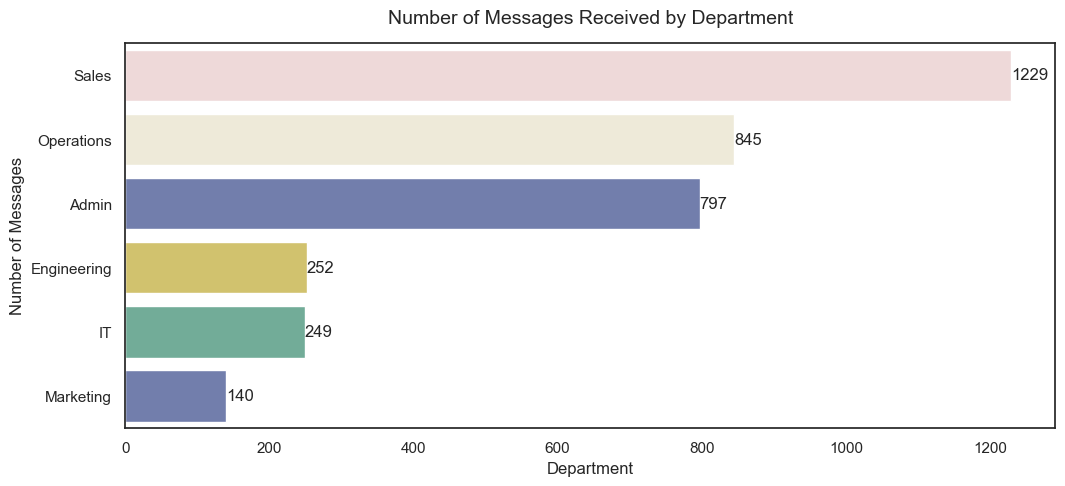

In [15]:
# Number of messages received by Department
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = received_emails, y = 'department', order = received_emails['department'].value_counts().index, palette= {'Sales':'#f2d6d5', 'Operations':'#f2ecd5', 'Admin':'#6879b6', 'IT':'#68b69b', 'Engineering':'#e2cd5d', 'Marketing': '#6879b6'})
plt.title('Number of Messages Received by Department', y = 1.03, size = 14)
plt.xlabel('Department')
plt.ylabel('Number of Messages')
ax.bar_label(ax.containers[0])
plt.show()

In [16]:
# Finding out percentages
received_emails['department'].value_counts(normalize = True)

Sales          0.349943
Operations     0.240604
Admin          0.226936
Engineering    0.071754
IT             0.070900
Marketing      0.039863
Name: department, dtype: float64

The same departments are the ones with the highest number of messages being received; but in this case, Enginering, IT and Marketing with slightly higher numbers. 

### Messages by Location and Department

We can combine the previous two sections by viewing how messages differ by location and department. 

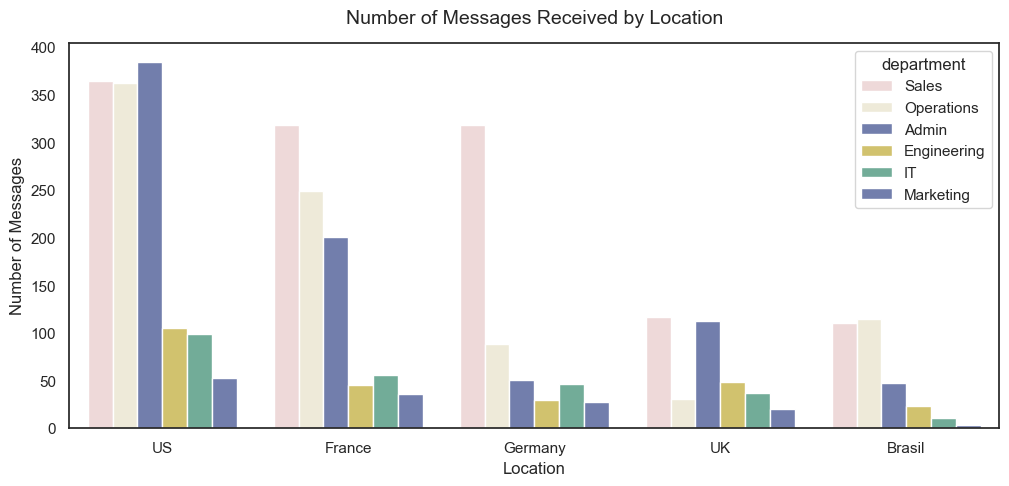

In [17]:
# Number of messages received by location and department
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 5))
sns.countplot(data = received_emails, x = 'location', order = received_emails['location'].value_counts().index, hue = 'department', hue_order = received_emails['department'].value_counts().index,  palette= {'Sales':'#f2d6d5', 'Operations':'#f2ecd5', 'Admin':'#6879b6', 'IT':'#68b69b', 'Engineering':'#e2cd5d', 'Marketing': '#6879b6'})
plt.title('Number of Messages Received by Location', y = 1.03, size = 14)
plt.xlabel('Location')
plt.ylabel('Number of Messages')
plt.show()

The previous graph joins both the location and departments with the highest number of messages received. We can conclude that most of the messages are being received by the United States, specially within the Admin, Sales and Operations departments, as well as in France for the same divisions. 

### Most Active Employees

Now that we know how messages are sent across locations and divisions, it is important to know which are the most active employees. We will do this by inspecting the top five senders, as well as the top five receivers. 

In [18]:
# Finding the top senders (most active employees)
top_senders = sent_emails.groupby('sender')['sender'].count().reset_index(name = 'count').sort_values('count', ascending = False)[:5]

print('Top Senders: ')

top_senders_info = top_senders.merge(sent_emails, on='sender', how='left')
top_senders_info.groupby(['sender', 'location', 'department'], as_index = False)['count'].count().sort_values('count', ascending = False)

Top Senders: 


,sender,location,department,count
4,605,France,Admin,459
0,128,France,Sales,266
1,144,US,Sales,221
3,509,US,Admin,216
2,389,France,Sales,196


Employees with id number 605, 128, 144, 509 and 389 are the employees with the highest numbers of messages sent during the period. These employees come from the Sales department from the United States and France; and from the department of Administration in France. These match with the previous graph which showed that these are some of the most contacted divisions across the companies. 

In [19]:
# Finding the top receivers (most active employees)
top_receivers = received_emails.groupby('receiver')['receiver'].count().reset_index(name = 'count').sort_values('count', ascending = False)[:5]

print('Top Receivers: ')

top_receivers_info = top_receivers.merge(received_emails, on='receiver', how='left')
top_receivers_info.groupby(['receiver', 'location', 'department'], as_index = False)['count'].count().sort_values('count', ascending = False)

Top Receivers: 


,receiver,location,department,count
1,281,France,Sales,60
3,704,US,Operations,54
2,308,Germany,Sales,51
0,236,US,Sales,47
4,830,Germany,Sales,47


Employees with id number 281, 704, 308, 236 and 830 are the top 5 employees with the highest number of messages received. These employees come mainly from the Sales department in United States, France and Germany; as well as from the Operations team in United States. 

### Employees with the Highest Connections

Despite these customers being the most active across the corporation, it might be relevant to know which employees have the highest connections, as these collaborators might be dealing with high levels of work due to the wide variety of connections that they have to deal with in their daily activities. 

In [20]:
# Counting the number of different employee contacts to which employees send messages
employees_highest_connections = messages.groupby(['sender', 'receiver'])['receiver'].count().reset_index(name = 'count').sort_values('count', ascending = False)
print('Employees with the highest number of connections: ')
employees_highest_connections['sender'].value_counts()[:3]

Employees with the highest number of connections: 


598    77
144    75
128    71
Name: sender, dtype: int64

In [21]:
# Validation of number of different contacts of employee 598
messages[messages['sender'] == 598]['receiver'].nunique()

77

The three employees with the highest number of contacts or connections are employees 598, 144 and 128, with 77, 75 and 71 different employees respectively to which they made contact during the observed period. 

The employee 598 had 77 unique connections with receivers accros different departments. The following table provides all the connections made from this employee during the observed period. 

In [22]:
# Getting the information on employee 598: number of contacts by department and location
information_highest_connections = employees_highest_connections.merge(employees, left_on = 'sender', right_on = 'id')
information_highest_connections = information_highest_connections[information_highest_connections['sender'].isin([598])][['sender', 'department', 'location', 'receiver']]

information_highest_connections = information_highest_connections.merge(employees, left_on = 'receiver', right_on = 'id')
information_highest_connections = information_highest_connections.rename(columns = {'department_x' : 'sender department', 'location_x' : 'sender location', 'department_y' : 'receiver department', 'location_y': 'receiver location'})
information_highest_connections[['sender', 'sender department', 'sender location', 'receiver', 'receiver department', 'receiver location']]

,sender,sender department,sender location,receiver,receiver department,receiver location
0,598,Operations,US,542,Sales,Germany
1,598,Operations,US,400,Sales,Germany
2,598,Operations,US,652,Sales,US
3,598,Operations,US,252,Operations,Germany
4,598,Operations,US,1070,Engineering,UK
...,...,...,...,...,...,...
72,598,Operations,US,830,Sales,Germany
73,598,Operations,US,870,Operations,US
74,598,Operations,US,915,Engineering,US
75,598,Operations,US,1006,Sales,US


In addition, the following bar plot shows the messages sent to different departments. 

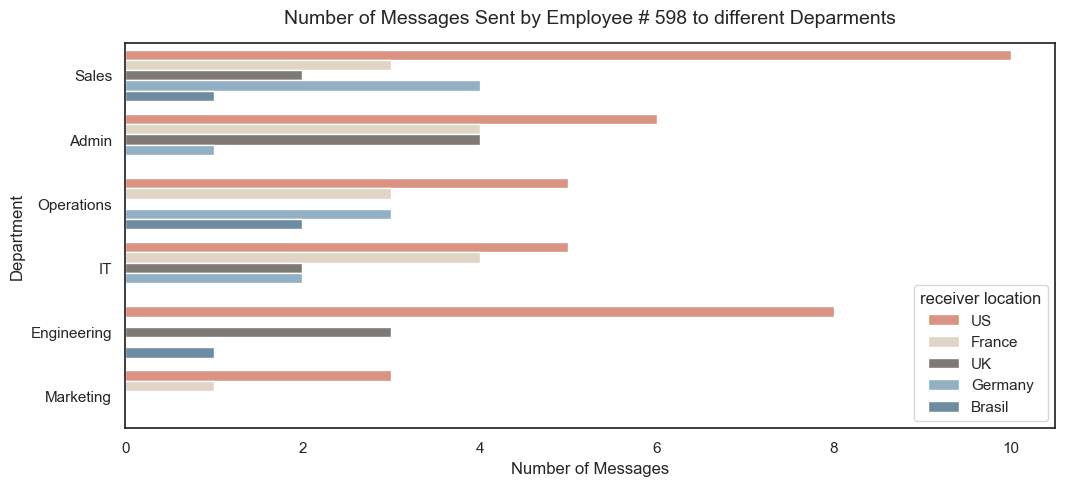

In [23]:
# Getting the information on employee 598: number of contacts by department and location
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 5))
sns.countplot(data = information_highest_connections, y = 'receiver department', order = information_highest_connections['receiver department'].value_counts().index, hue = 'receiver location', hue_order = information_highest_connections['receiver location'].value_counts().index, palette= {'US':'#E98973', 'France':'#E7D4C0', 'Germany':'#88B2CC', 'Brasil':'#658EA9', 'UK':'#817874'})
plt.title('Number of Messages Sent by Employee # 598 to different Deparments', y = 1.03, size = 14)
plt.ylabel('Department')
plt.xlabel('Number of Messages')
plt.show()

Employee 598, which is from the Operations department of the United States, sends the majority of its messages to the Sales department, mainly to United States and France; and the Administration department, from the United States, France and UK. It might be good for the company to contact this employee to undertand their role and whether the load of work is too much or not. Doing this with employees that send high amount of messages or which have a huge amount of connections might help the company to identify potential issues. 

### Employees with the Highest Interaction

Now that we have a clear view of how employees are sending and receiving messages, we want to explore which employees are having the highest interactions. 

In [24]:
# Counting the number interactions between senders and receivers
employees_highest_interaction = messages.groupby(['sender', 'receiver'])['receiver'].count().reset_index(name = 'count').sort_values('count', ascending = False)
employees_highest_interaction 

,sender,receiver,count
778,605,704,50
530,509,454,36
506,483,821,35
251,317,308,33
780,605,734,29
...,...,...,...
472,469,97,1
476,469,519,1
479,469,697,1
488,483,127,1


The employees with the highest number of interactions were employees 605 and 704, with 50 interactions during the period, followed by employees 509 and 454 with 36 interactions. We can preview the interactions between employees with the following heatmap.

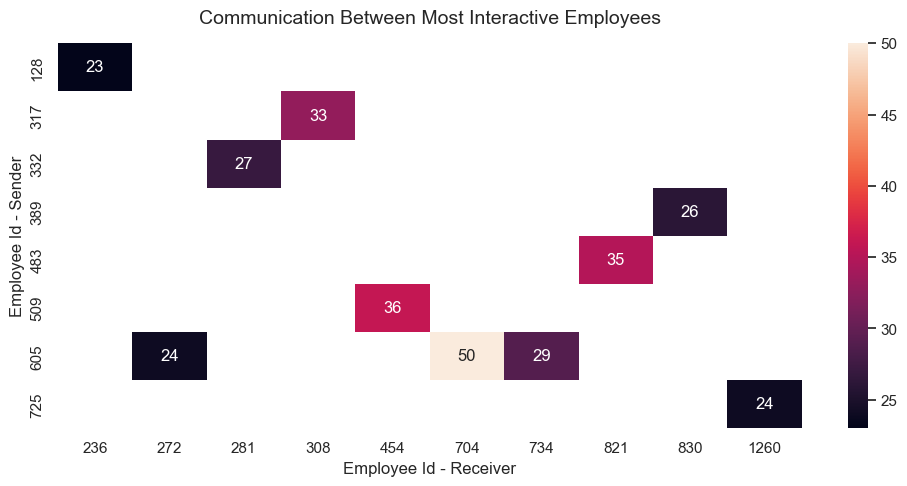

In [25]:
# Communication between the most interactive employees
top_employees_highest_interaction = employees_highest_interaction[:10]
top_employees_highest_interaction_pivot = top_employees_highest_interaction.pivot(index = 'sender', columns = 'receiver', values = 'count')
top_employees_highest_interaction_pivot

sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 5))
sns.heatmap(data = top_employees_highest_interaction_pivot, annot = True, fmt='.0f')
plt.title('Communication Between Most Interactive Employees', y = 1.03, size = 14)
plt.ylabel('Employee Id - Sender')
plt.xlabel('Employee Id - Receiver')
plt.show()

From the previous heatmap we can see that all top interactors mainly maintain constant contact with only an additional employee. However, employee number 605 has constant interactions with more than one collaborator. 

### Intra-Department Interaction

This exercise can also be done by department. 

In [26]:
# Creating a dataframe of sent and received messages
receivers_department_by_id = received_emails[['receiver', 'department', 'location', 'age']].drop_duplicates()
sent_received_df = sent_emails.merge(receivers_department_by_id, on = ['receiver'], how = 'inner', suffixes = ('_sender', '_receiver'))
sent_received_df

,sender,receiver,timestamp,message_length,id,department_sender,location_sender,age_sender,department_receiver,location_receiver,age_receiver
0,79,48,2021-06-02 05:41:34,88,79,Sales,France,33,IT,France,34
1,144,48,2021-06-05 11:19:34,33,144,Sales,US,50,IT,France,34
2,144,48,2021-06-05 11:35:09,85,144,Sales,US,50,IT,France,34
3,144,48,2021-06-05 11:39:57,69,144,Sales,US,50,IT,France,34
4,144,48,2021-06-07 08:09:32,28,144,Sales,US,50,IT,France,34
...,...,...,...,...,...,...,...,...,...,...,...
3507,1881,1079,2021-11-17 07:11:12,22,1881,Sales,Germany,57,Engineering,UK,58
3508,1881,1079,2021-11-17 07:21:27,41,1881,Sales,Germany,57,Engineering,UK,58
3509,1881,1079,2021-11-17 07:25:51,28,1881,Sales,Germany,57,Engineering,UK,58
3510,1881,1079,2021-11-17 07:27:59,45,1881,Sales,Germany,57,Engineering,UK,58


In [27]:
# Generating a Pivot Table of the relationship between departments
department_counts = sent_received_df.groupby(['department_sender', 'department_receiver']).size().reset_index(name='count')
display(department_counts)
department_matrix = department_counts.pivot(index='department_receiver', columns='department_sender', values='count')
department_matrix

,department_sender,department_receiver,count
0,Admin,Admin,172
1,Admin,Engineering,33
2,Admin,IT,48
3,Admin,Marketing,19
4,Admin,Operations,287
5,Admin,Sales,298
6,Engineering,Admin,4
7,Engineering,Engineering,6
8,Engineering,IT,3
9,Engineering,Operations,8


department_sender,Admin,Engineering,IT,Marketing,Operations,Sales
department_receiver,,,,,,
Admin,172.0,4.0,8.0,4.0,245.0,364.0
Engineering,33.0,6.0,6.0,2.0,91.0,114.0
IT,48.0,3.0,6.0,NaN,76.0,116.0
Marketing,19.0,NaN,3.0,NaN,40.0,78.0
Operations,287.0,8.0,10.0,2.0,198.0,340.0
Sales,298.0,5.0,16.0,8.0,363.0,539.0


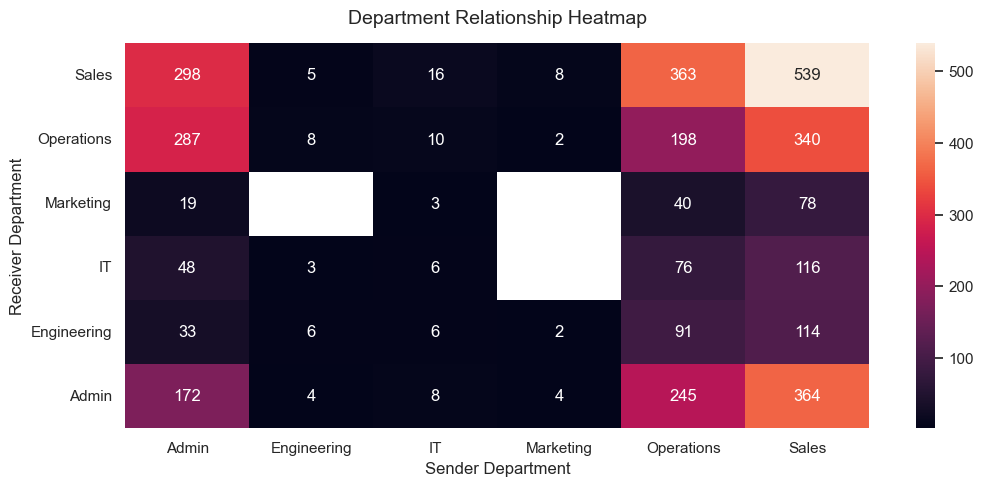

In [29]:
# Generating the heatmap for the relationship between deoartments
columns = ['Admin', 'Engineering', 'IT', 'Marketing', 'Operations', 'Sales']
index = ['Sales', 'Operations', 'Marketing', 'IT', 'Engineering', 'Admin']
department_matrix = department_matrix.reindex(index = index, columns = columns)

sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (12, 5))
sns.heatmap(data = department_matrix, annot = True, fmt='.0f')
plt.title('Department Relationship Heatmap', y = 1.03, size = 14)
plt.xlabel('Sender Department')
plt.ylabel('Receiver Department')
plt.show()

The departments which share the highest amount of messages are the Sales department. The departments where there are no communications are Marketing-Engineering, Marketing-Marketing, and Marketing-IT.

From the heatmap it can be ween that the IT, Marketing and Engineering department have the lowest rates of communication across divisions. It could be helpful if HR deployed a strategy to motivate for communication, as it might lead to higher performance across the teams. 

## ❔ Business Questions

After previewing all the information we can focus on answering HR's questions regarding the collaboration within the company. 

### Which departments are the most/least active?

From the previous information, we can conclude that the most active departments both in receiving and sending messages are Sales, Operations and Administration. On the contrary, the least active areas include Engineering, IT and Marketing. 

### Which employee has the most connections?

The employee with the highest number of connections (contacts within the time period), is employee number 598, which is located in US and works within the Operations department. This employee has messages with 77 other employees, mainly from the Sales Department of US and France; and the Administration department in US, France and UK. 

### Which are the most influential departments and employees?

The most influential departments and employees could be assumed to be those which receive the highest number of messages. This due to the possible requirements of approvals, directions required, etc. 

From this assumption, we can conclude that the departments with the highest influence are the Administration, Sales and Operations department from the United States. 

In addition, the employee with the highest influence is employee 281, which comes from the Sales department of France; which accounted for more than 60 messages received during the 6 months. 

### Which department is recommended for HR to focus to boost collaboration?

The departments with the least activity are areas such as Engineering, IT and Marketing. Collaboration and communication is essential to perform daily activities in companies. Thus, HR could focus on these areas to incentivize communication. 